In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, LeaveOneOut
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

# 1st Dataset - Whine Dataset

In [2]:
# Load wine data
whine_data = pd.read_csv("data/whine-data/wine_dataset.csv")

# Separate features and target
X = whine_data.drop("class", axis=1)
y = whine_data["class"]

count = y.value_counts()
print(count)

class
0    4898
1    1599
Name: count, dtype: int64


## Hold-Out stratify

In [3]:
# Perform stratified Hold-Out split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Balance data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [4]:
# Instantiate the Naive Bayes classifier
model_nb = GaussianNB()

# Train the classifier on the resampled training data
model_nb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model_nb.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1470
           1       0.91      0.97      0.94       480

    accuracy                           0.97      1950
   macro avg       0.95      0.97      0.96      1950
weighted avg       0.97      0.97      0.97      1950


Accuracy of the model: 0.9712820512820513




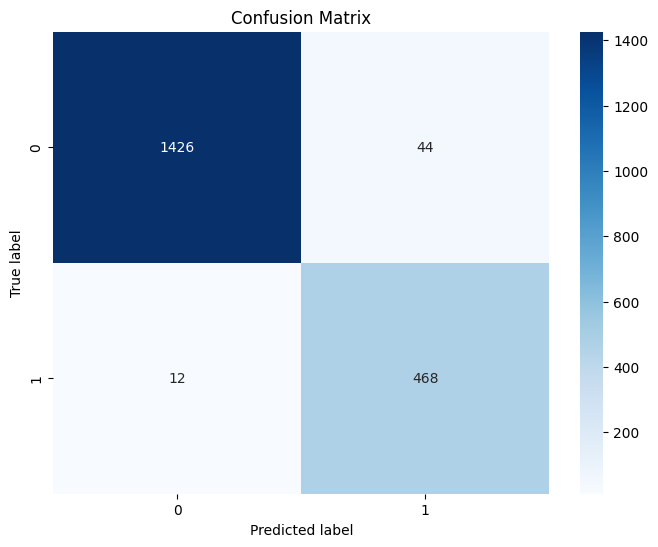

In [5]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}\n\n")

# Create a heatmap for the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold

In [6]:
# Initialize the 1NN classifier
model_nb = GaussianNB()

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

In [7]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Normalize the resampled training data
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    # Normalize the test data using the same scaler
    X_test = scaler.transform(X_test)

    # Train the classifier on the resampled training data
    model_nb.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_pred = model_nb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9733720516771365



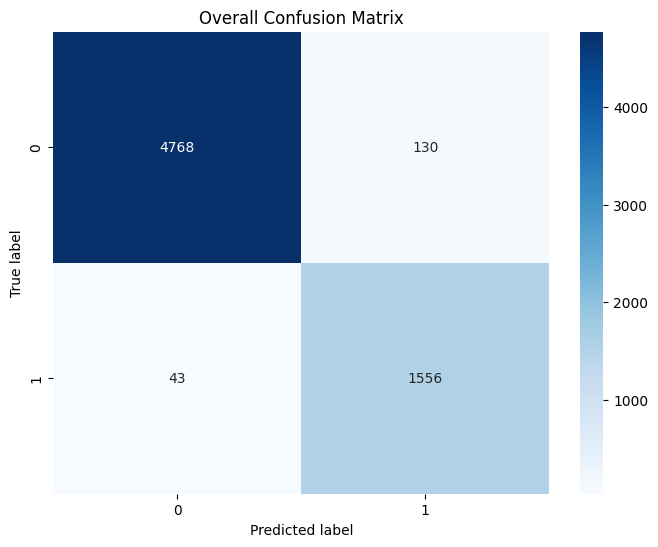

In [8]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix')
plt.show()

## Leave-One-Out

In [9]:
model_nb = GaussianNB()

loo = LeaveOneOut()

overall_confusion_matrix = np.zeros((2, 2))
accuracies = []

In [10]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train_resampled = scaler.fit_transform(X_train_resampled)

    X_test = scaler.transform(X_test)

    model_nb.fit(X_train_resampled, y_train_resampled)
    y_pred = model_nb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9733723256887794



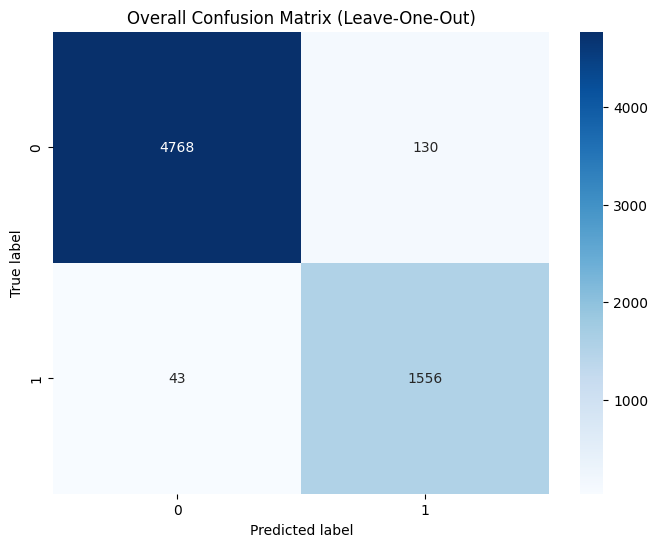

In [11]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])  # Specify labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix (Leave-One-Out)')
plt.show()

# 2nd Dataset - Gamma Telescope Dataset

In [12]:
gamma_data = pd.read_csv("data/GammaTelescopeData/gamma_dataset.csv")

X = gamma_data.drop("class", axis=1)
y = gamma_data["class"]

count = y.value_counts()
print(count)

class
0    12332
1     6688
Name: count, dtype: int64


## Hold-Out stratify

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)# Instantiate the classifier

In [15]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Instantiate the 1NN classifier
model_nb = GaussianNB()

# Train the classifier on the resampled training data
model_nb.fit(X_train_resampled, y_train_resampled)
y_pred = model_nb.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      3700
           1       0.67      0.41      0.51      2006

    accuracy                           0.72      5706
   macro avg       0.71      0.65      0.66      5706
weighted avg       0.71      0.72      0.70      5706


Accuracy of the model: 0.7229232386961093




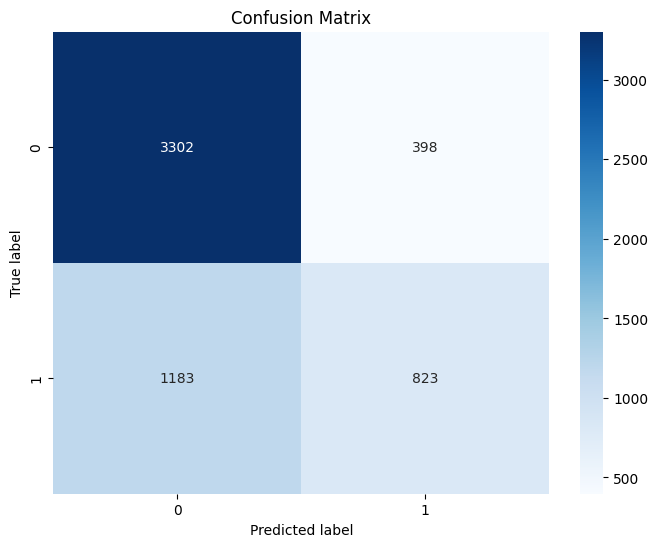

In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}\n\n")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold

In [17]:
model_nb = GaussianNB()

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

In [18]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Normalize the resampled training data
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    # Normalize the test data using the same scaler
    X_test = scaler.transform(X_test)

    model_nb.fit(X_train_resampled, y_train_resampled)
    y_pred = model_nb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.7259726603575183



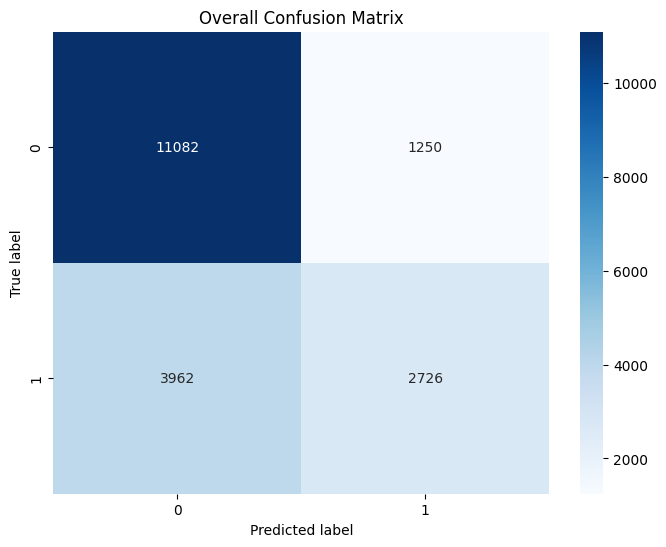

In [19]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix')
plt.show()

## Leave-One-Out

In [20]:
model_nb = GaussianNB()

loo = LeaveOneOut()

overall_confusion_matrix = np.zeros((2, 2))
accuracies = []

In [21]:
gamma_data = pd.concat([X, y], axis=1)

sampled_data = gamma_data.groupby("class").sample(n=3500, random_state=42)


X_sampled = sampled_data.drop("class", axis=1)
y_sampled = sampled_data["class"]

print(y_sampled.value_counts())

class
0    3500
1    3500
Name: count, dtype: int64


In [22]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in loo.split(X_sampled):
    X_train, X_test = X_sampled.iloc[train_index], X_sampled.iloc[test_index]
    y_train, y_test = y_sampled.iloc[train_index], y_sampled.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train_resampled = scaler.fit_transform(X_train_resampled)

    X_test = scaler.transform(X_test)

    model_nb.fit(X_train_resampled, y_train_resampled)
    y_pred = model_nb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.6488571428571429



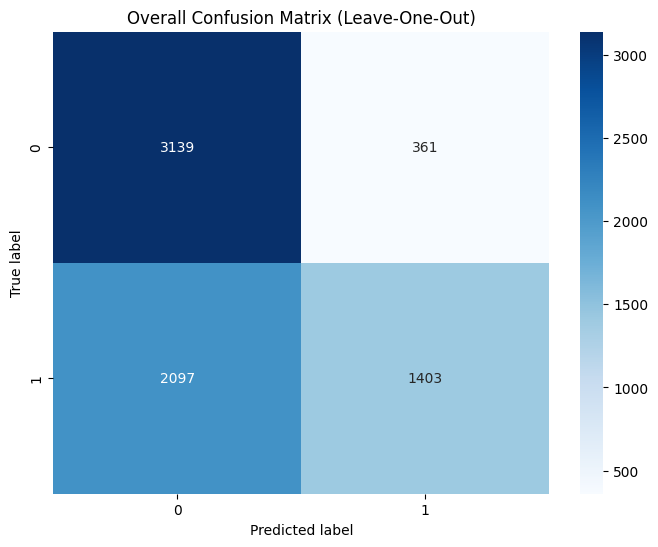

In [23]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])  # Specify labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix (Leave-One-Out)')
plt.show()

# 3rd Dataset - Banknote Auth Dataset

In [24]:
banknoteData = pd.read_csv("data/BanknoteAuthentication/banknote_dataset.csv")

X = banknoteData.drop("class", axis=1)
y = banknoteData["class"]

count = y.value_counts()
print(count)

class
0    762
1    610
Name: count, dtype: int64


## Hold-Out stratify

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Instantiate the 1NN classifier
model_nb = GaussianNB()

# Train the classifier on the resampled training data
model_nb.fit(X_train_resampled, y_train_resampled)
y_pred = model_nb.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       229
           1       0.84      0.86      0.85       183

    accuracy                           0.87       412
   macro avg       0.86      0.87      0.87       412
weighted avg       0.87      0.87      0.87       412


Accuracy of the model: 0.866504854368932




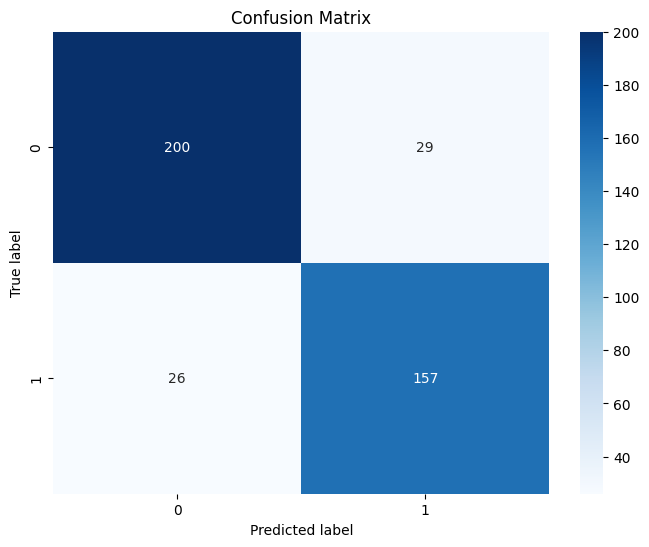

In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}\n\n")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold

In [29]:
# Instantiate the 1NN classifier
model_nb = GaussianNB()

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

In [30]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Normalize the resampled training data
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    # Normalize the test data using the same scaler
    X_test = scaler.transform(X_test)

    # Train the classifier on the resampled training data
    model_nb.fit(X_train_resampled, y_train_resampled)
    y_pred = model_nb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.8418808843753306



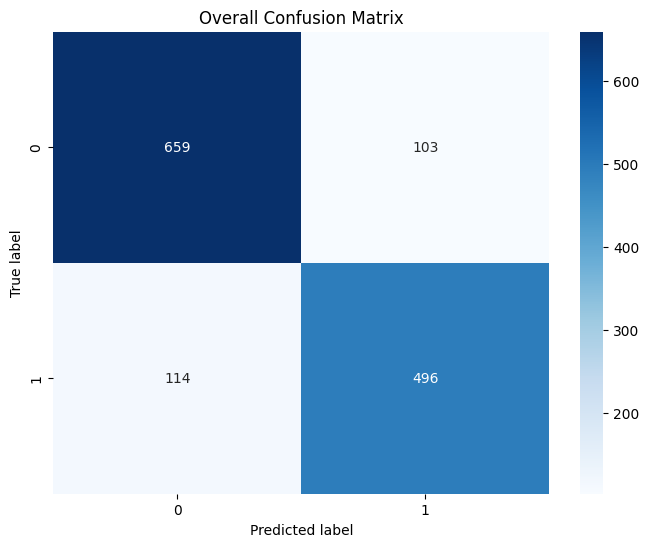

In [31]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix')
plt.show()

## Leave-One-Out

In [32]:
model_nb = GaussianNB()

loo = LeaveOneOut()

overall_confusion_matrix = np.zeros((2, 2))
accuracies = []

In [33]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train_resampled = scaler.fit_transform(X_train_resampled)

    X_test = scaler.transform(X_test)

    # Train the classifier on the resampled training data
    model_nb.fit(X_train_resampled, y_train_resampled)
    y_pred = model_nb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9985422740524781



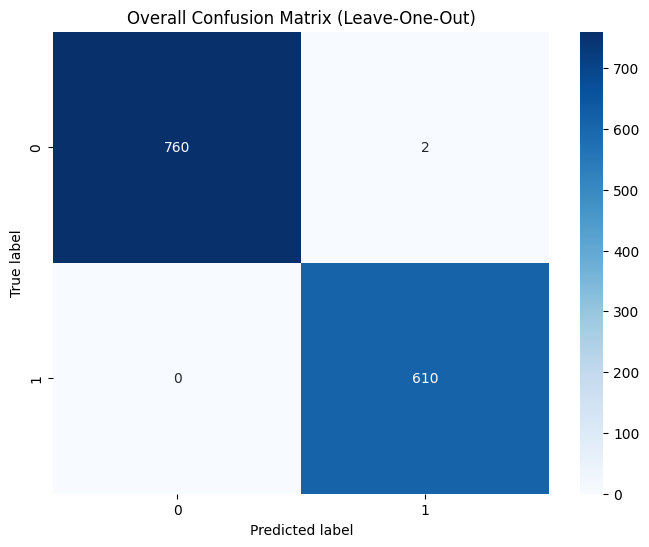

In [ ]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])  # Specify labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix (Leave-One-Out)')
plt.show()